In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

Step 1: Read In Data Set and Explore Data
We need to read in the data set and get a feel to what data needs to be cleaned 

In [2]:
df = pd.read_csv('data_set/Meteorite_Landings.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1/1/1951 0:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1/1/1952 0:00,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1/1/1976 0:00,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1/1/1902 0:00,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
# For exploring the data
print("Size of DataSet(rows, columns): ", df.shape)
print()
print("Quick Stats of Dataset: ", df.info())
print()
print("Columns of Dataset: ", df.columns)

Size of DataSet(rows, columns):  (45716, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass (g)       45585 non-null float64
fall           45716 non-null object
year           45425 non-null object
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB
Quick Stats of Dataset:  None

Columns of Dataset:  Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')


Looking at the describe() there seems to be null values in the mass, year, reclong, reclat, and GeoLocation columns. Let's use the following command down below just to make sure

Step 2: Drop null values
The first real step in cleaning your data is dropping null values

In [4]:
pd.isnull(df).sum() # check for NaN's and None's

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [5]:
df.dropna(axis=0, how='any', inplace=True)
pd.isnull(df).sum() # drop all missing values inside of the data set

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

Data can also be replaced by using df.replace(to_replace=None, value=None) but that won't be necessary with this data set. Note a feature/attribute/column can also be dropped if more than %90 of the rows have null values with a simple df.drop(df['feature_name'], axis=1). 

Step 3 : Dropping Irrelevenat Features
Not all features/attributes/columns are relevant to your goal, the best way is to figure out what your end goal is and determine what is absolutley necessary to achieve that 

In [6]:
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1/1/1951 0:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1/1/1952 0:00,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1/1/1976 0:00,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1/1/1902 0:00,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [7]:
print(df.fall.unique()) # fall just tracks if the meteorite was seen falling towards the earth (fell)  
print() # or if it was found before the fall (found)
print(df['fall'].value_counts()) # displays amount of unqiue values for each

['Fell' 'Found']

Found    37050
Fell      1065
Name: fall, dtype: int64


In [8]:
print(df.nametype.unique())
print()
print(df['nametype'].value_counts()) # we do the same analysis with name type

['Valid' 'Relict']

Valid     38094
Relict       21
Name: nametype, dtype: int64


In [9]:
print(df.recclass.unique()) # recclass is the class of meteorite
print() # this might come in handy later but we may need to drop it later 
print(df['recclass'].value_counts()) # we will keep it for now

['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm' 'H4'
 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4' 'Eucrite-mmict' 'CV3'
 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6' 'L4' 'Aubrite'
 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'Mesosiderite-A1'
 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict' 'Diogenite' 'LL3.15'
 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Eucrite' 'H4-an' 'L/LL6' 'Iron, IIIAB'
 'OC' 'H/L4' 'H4-5' 'L3.7' 'LL3.4' 'Martian (chassignite)' 'EL6' 'H3.8'
 'H3-5' 'H5-6' 'Mesosiderite' 'H5-7' 'L3-6' 'H4-6' 'Ureilite' 'Iron, IID'
 'Mesosiderite-A3/4' 'CO3.3' 'H3' 'EH3/4-an' 'Iron, IIE' 'L/LL5' 'H3.7'
 'CBa' 'H4/5' 'H3/4' 'H?' 'H3-6' 'L3.4' 'Iron, IAB-sHL' 'L3.7-6' 'EH7-an'
 'Iron' 'CR2' 'CO3.2' 'K3' 'L5/6' 'CK4' 'Iron, IIE-an' 'L3.6' 'LL3.2'
 'CO3.5' 'Lodranite' 'Mesosiderite-A3' 'L3-4' 'H5/6' 'Pallasite, PMG'
 'Eucrite-cm' 'Pallasite' 'L5-6' 'CO3.6' 'Martian (nakhlite)' 'LL3.6'
 'C3-ung' 'H3-4' 'CO3.4' 'EH3' 'Iron, IAB-ung' 'Winonaite' 'LL'
 'Eucrite-b

In [10]:
df.drop(['nametype', 'fall'], axis=1, inplace=True)

In [11]:
df.head()

,name,id,recclass,mass (g),year,reclat,reclong,GeoLocation
0,Aachen,1,L5,21.0,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,H6,720.0,1/1/1951 0:00,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,EH4,107000.0,1/1/1952 0:00,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Acapulcoite,1914.0,1/1/1976 0:00,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,L6,780.0,1/1/1902 0:00,-33.16667,-64.95000,"(-33.16667, -64.95)"


Step 4: Standardization 
Now that we have dropped the columns that are not necessary we will now format the columns so that they are readable for our data set

In [12]:
# we need to minimize our year so it just says the year the meteor landed, not the whole date
df['year'].head()

0    01/01/1880 12:00:00 AM
1             1/1/1951 0:00
2             1/1/1952 0:00
3             1/1/1976 0:00
4             1/1/1902 0:00
Name: year, dtype: object

In [13]:
extr = df['year'].str.extract(pat="(\d{4})") # using regex we get the last 4 digits of each date
print(df['year'].head())
extr.head()

0    01/01/1880 12:00:00 AM
1             1/1/1951 0:00
2             1/1/1952 0:00
3             1/1/1976 0:00
4             1/1/1902 0:00
Name: year, dtype: object


,0
0,1880
1,1951
2,1952
3,1976
4,1902


In [18]:
# replace year with extr and label it year
df.drop(['year'], axis=1, inplace=True)
df.insert(loc=0, column='year', value=extr)

In [19]:
df.head() # should display only the year for year

,year,name,id,recclass,mass (g),reclat,reclong,GeoLocation
0,1880,Aachen,1,L5,21.0,50.77500,6.08333,"(50.775, 6.08333)"
1,1951,Aarhus,2,H6,720.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,1952,Abee,6,EH4,107000.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,1976,Acapulco,10,Acapulcoite,1914.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,1902,Achiras,370,L6,780.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [21]:
# round reclat and reclong to 2 digits past the decimal point
# since the only floats are reclat, reclong, and mass: these will be the ones rounded
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38115 entries, 0 to 45715
Data columns (total 8 columns):
year           38115 non-null object
name           38115 non-null object
id             38115 non-null int64
recclass       38115 non-null object
mass (g)       38115 non-null float64
reclat         38115 non-null float64
reclong        38115 non-null float64
GeoLocation    38115 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 2.6+ MB


In [36]:
df = df.round(decimals=2) # rounds to two decimal places

In [37]:
# replace Geolocation with input from reclat and reclong 
# should look like (reclat, reclong) to reclat, reclong
# if that is not possible just drop it and create a new GeoLocation column
df.drop(['GeoLocation'], axis=1)
df['GeoLocation'] = df['reclat'].map(str) + ", " + df['reclong'].map(str)
df.head()

,year,name,id,recclass,mass (g),reclat,reclong,GeoLocation
0,1880,Aachen,1,L5,21.0,50.78,6.08,"50.78, 6.08"
1,1951,Aarhus,2,H6,720.0,56.18,10.23,"56.18, 10.23"
2,1952,Abee,6,EH4,107000.0,54.22,-113.00,"54.22, -113.0"
3,1976,Acapulco,10,Acapulcoite,1914.0,16.88,-99.90,"16.88, -99.9"
4,1902,Achiras,370,L6,780.0,-33.17,-64.95,"-33.17, -64.95"


Step 5: Check for Outliers 

In [58]:
df.head()

,year,name,id,recclass,mass (g),reclat,reclong,GeoLocation
0,1880,Aachen,1,L5,21.0,50.78,6.08,"50.78, 6.08"
1,1951,Aarhus,2,H6,720.0,56.18,10.23,"56.18, 10.23"
2,1952,Abee,6,EH4,107000.0,54.22,-113.00,"54.22, -113.0"
3,1976,Acapulco,10,Acapulcoite,1914.0,16.88,-99.90,"16.88, -99.9"
4,1902,Achiras,370,L6,780.0,-33.17,-64.95,"-33.17, -64.95"


In [61]:
# the relevant attributes we need to look for outliers in are year and mass
# outliers will be values less than Q1-1.5*IQR and values greater than Q3+1.5*IQR according to 
# the definition of Inter Quartile Range
Q1 = df['mass (g)'].quantile(0.25)
Q3 = df['mass (g)'].quantile(0.75)
IQR = Q3 - Q1
IQR

180.66

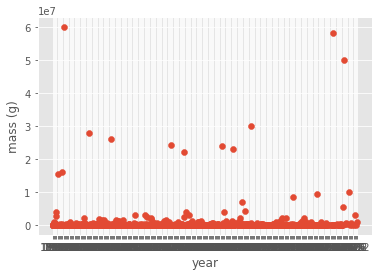

In [74]:
plt.scatter(x = df['year'],y = df['mass (g)'])
plt.xlabel(xlabel='year')
plt.ylabel(ylabel='mass (g)')
plt.show()

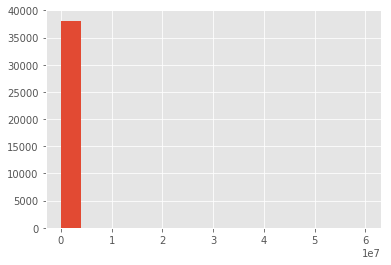

In [72]:
plt.hist(df['mass (g)'], bins=15)
plt.show()

In [67]:
df['mass (g)'].value_counts()

1.30        155
1.20        122
1.40        120
2.10        115
2.40        108
3.80        104
1.60        101
1.70         97
0.70         97
1.50         96
3.00         95
1.10         94
1.80         93
3.20         93
3.10         91
0.50         91
0.60         90
2.50         89
3.60         88
2.70         87
0.90         84
2.90         83
1.00         82
2.00         82
0.80         81
4.20         80
2.20         79
2.60         79
2.80         77
3.40         77
           ... 
94800.00      1
637.00        1
825.00        1
33.19         1
38.03         1
40.81         1
424.20        1
18.09         1
51500.00      1
97.45         1
92.99         1
1767.20       1
409.90        1
2195.00       1
29.68         1
389.21        1
146.35        1
4763.00       1
13901.00      1
1637.00       1
785.10        1
23.03         1
17.28         1
758.70        1
202.69        1
355.40        1
7526.40       1
397.56        1
46.29         1
1413.60       1
Name: mass (g), Length: 

Step 6: Check for Bad Data and Duplicates

In [38]:
df.isnull().sum()

year           0
name           0
id             0
recclass       0
mass (g)       0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [57]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,year,name,id,recclass,mass (g),reclat,reclong,GeoLocation


In [75]:
df.to_csv('data_set/M_Landings_cleaned.csv')